In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, ensemble, model_selection
import numpy as np
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import shap
from sklearn.datasets import make_multilabel_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
# load the csv file as a data frame
df = pd.read_csv('../data/current-dataset-unnormalized/feature-dataset.csv',delimiter=",",index_col=0)
y = df.label.copy()
X = df.drop('label',axis=1)

train = pd.read_csv('../data/current-dataset-unnormalized/train-feature-customsplit.csv', delimiter=",",index_col=0)
test = pd.read_csv('../data/current-dataset-unnormalized/test-feature-customsplit.csv', delimiter=",",index_col=0)
X_train = train.drop(columns='label')
y_train = train['label']
X_test = test.drop(columns='label')
y_test = test['label']

In [3]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.utils import to_categorical

feature_names = list(X.columns)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(y.copy())
class_names = label_encoder.classes_


cls = RandomForestClassifier(random_state=42)

cls.fit(X_train, y_train)

shap.initjs()

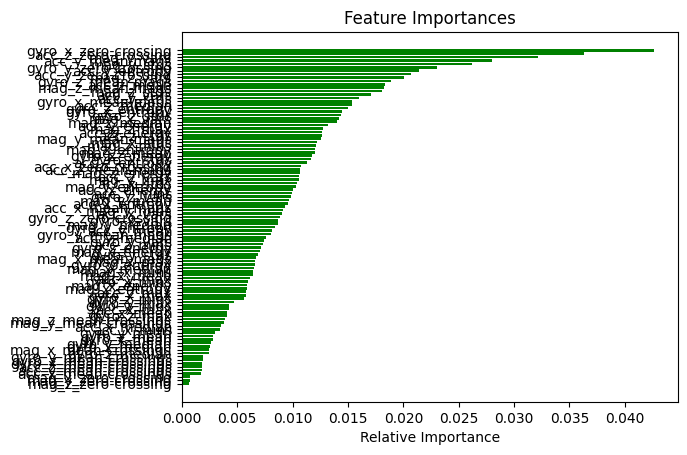

In [4]:
importances = cls.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# compute SHAP values
explainer = shap.TreeExplainer(cls)
shap_values = explainer.shap_values(X.sample(1000))
shap.summary_plot(shap_values, X.values, plot_type="bar", class_names= class_names, feature_names = X.columns, max_display=100,plot_size=(25,25))

#2m 5.2s for 100
#20 min for 1000
#crashes for 10.000

In [21]:
# compute SHAP values
explainer = shap.Explainer(cls)
shap_values = explainer.shap_values(X.iloc[0:100])

#2m 6.0s

In [ ]:
# explain all the predictions in the test set
explainer = shap.KernelExplainer(cls.predict_proba, shap.kmeans(X_train,20))
shap_values = explainer.shap_values(X,nsamples=100)

##estimated 34h for an aproximation of the full dataset

Now we can plot relevant plots that will help as analyze the model.

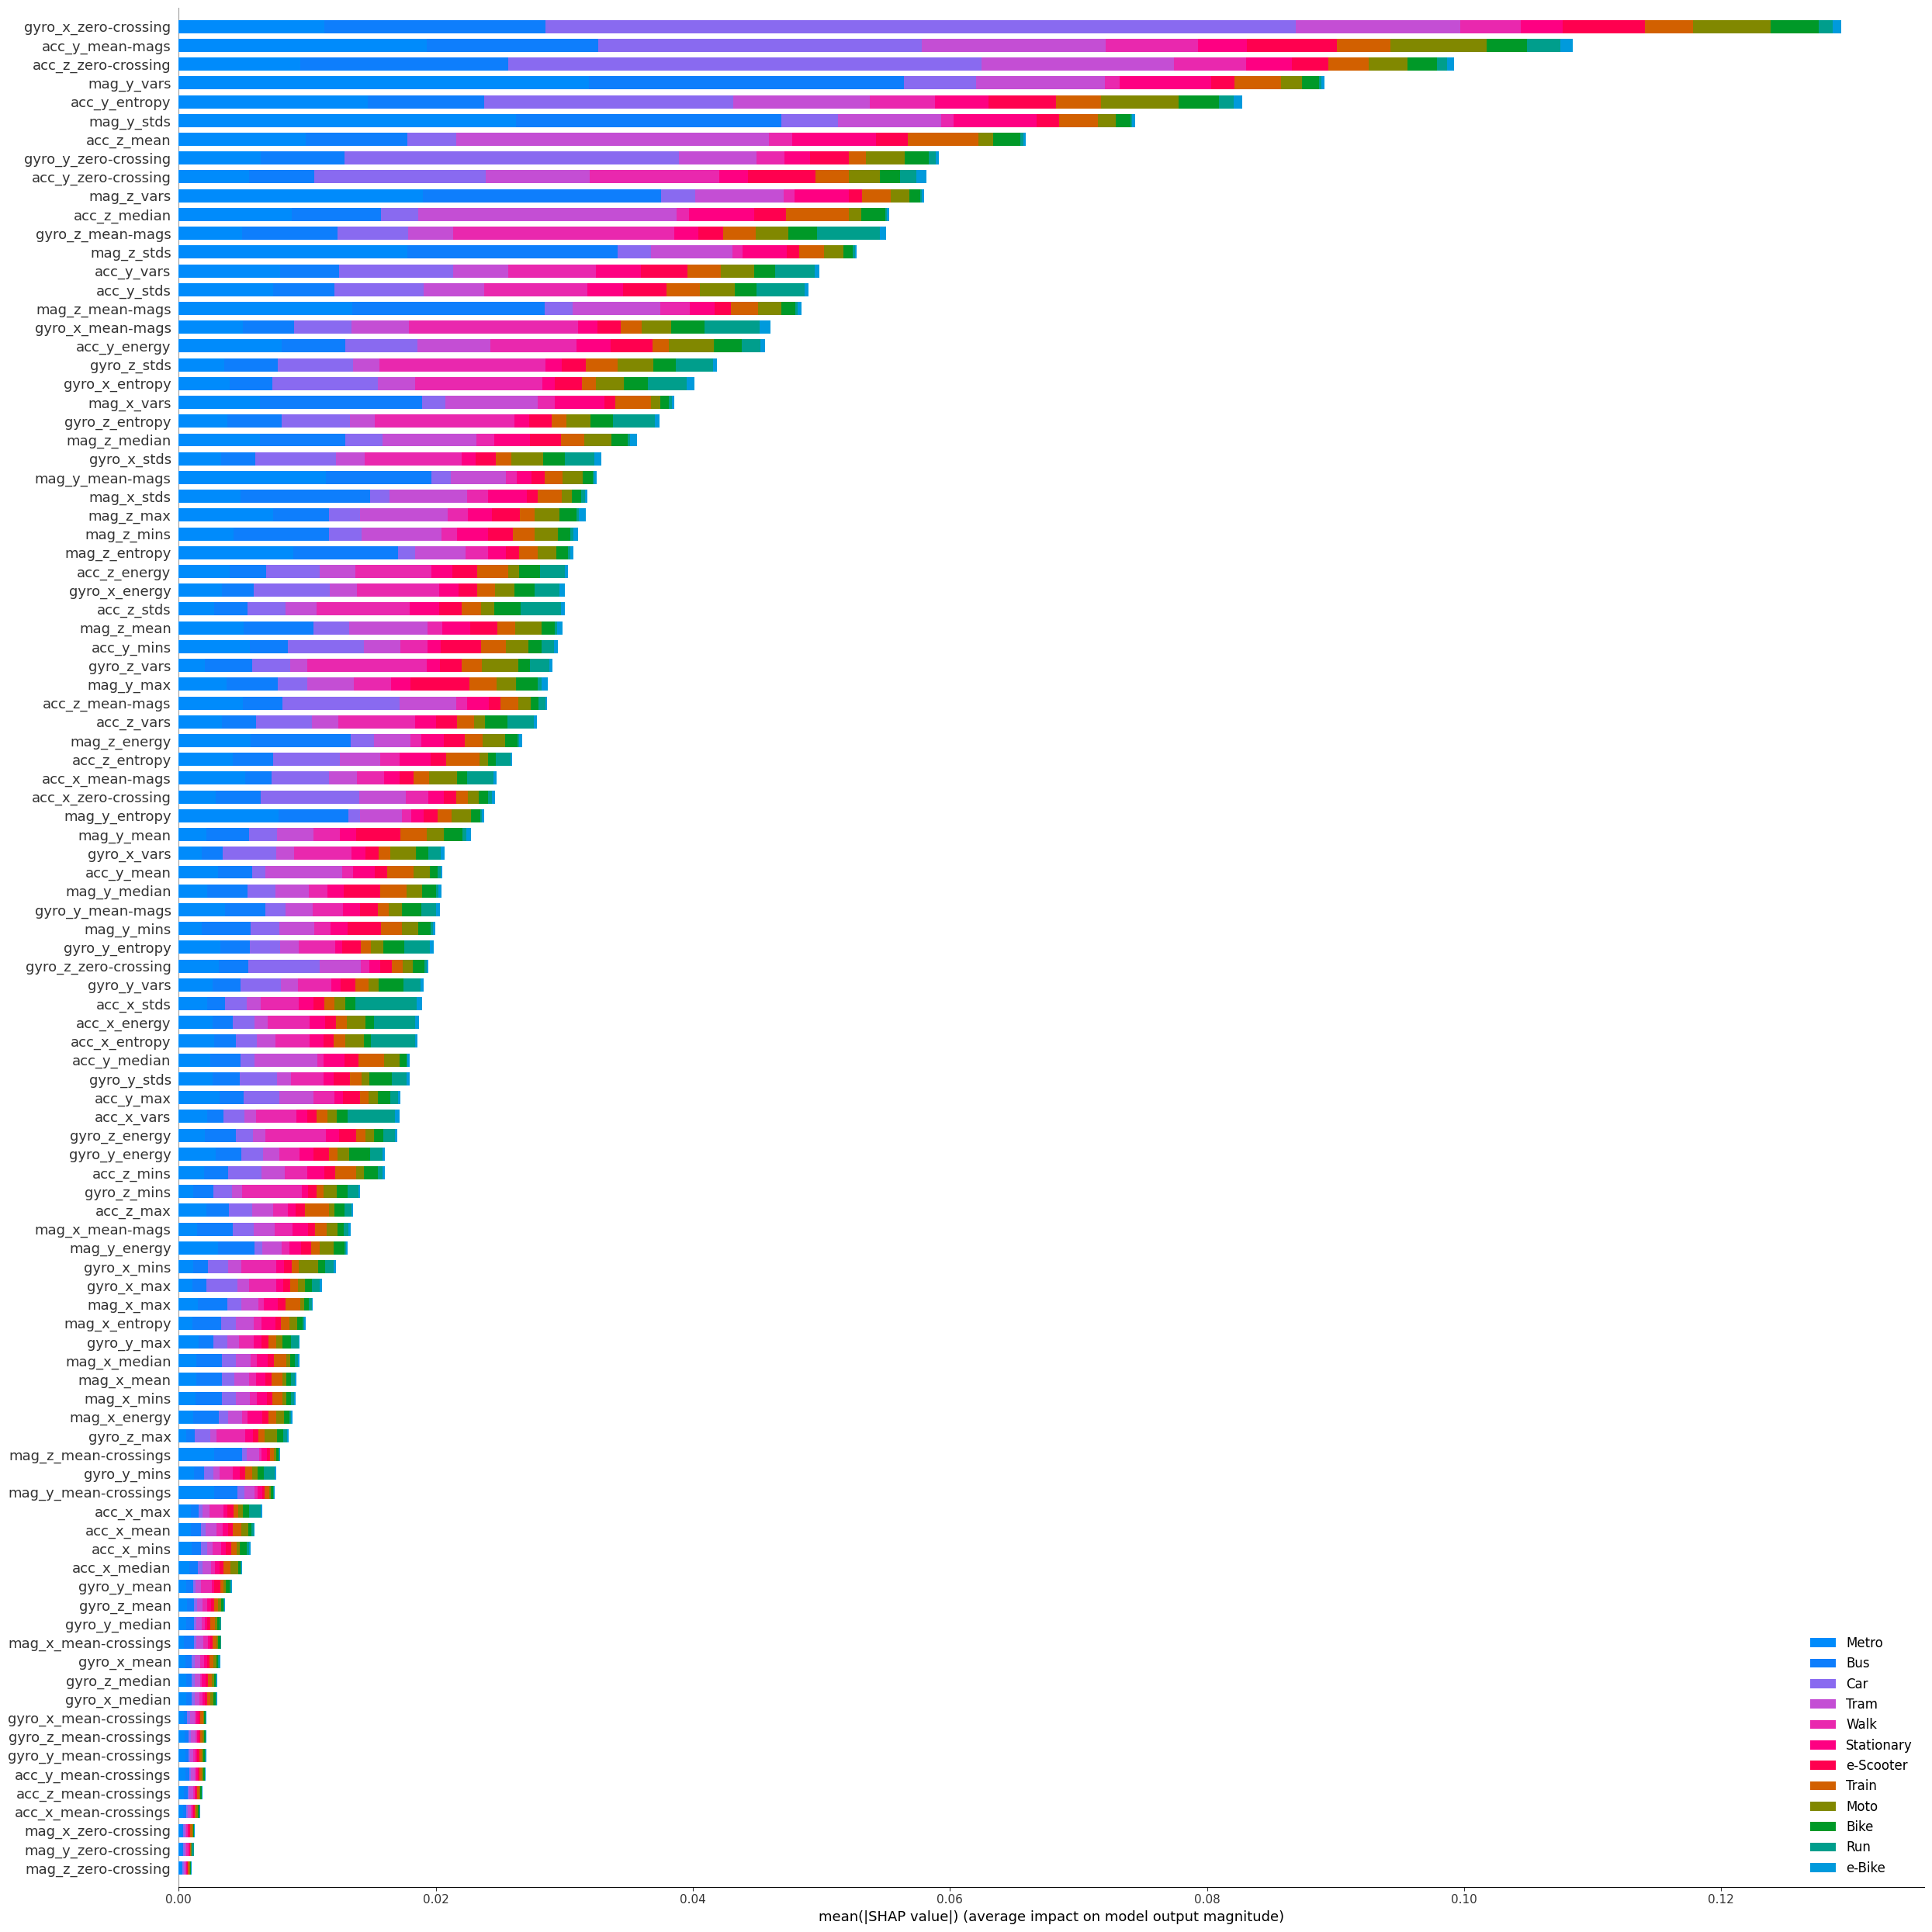

In [39]:
explainer = shap.TreeExplainer(cls)
shap_values = explainer.shap_values(X.sample(1000))
shap.summary_plot(shap_values, X.values, plot_type="bar", class_names= class_names, feature_names = X.columns, max_display=100,plot_size=(25,25))

shap.summary_plot(shap_values, X.values, plot_type="bar", class_names= class_names, feature_names = X.columns, max_display=100,plot_size=(25,25))